Project Summary: Uber Rides Analysis

In this project, I conducted an in-depth analysis of Uber ride data to identify key trends and insights. Using Python libraries such as Pandas, Matplotlib, and Seaborn, I explored various aspects of the data, such as ride categories, purposes, booking times, monthly trends, weekly trends, and distances traveled. The goal was to uncover patterns that can help improve customer experience and operational efficiency.

Key Insights: Ride Categories: The most popular ride categories were identified based on booking frequencies. Purpose of Rides: Business and leisure were analyzed as primary reasons for booking Uber rides. Peak Booking Times: The data revealed specific times when users are most active, indicating peak hours. Seasonal Trends: Analysis of monthly booking patterns showed months with high and low demand. Weekly Behavior: Certain days of the week exhibited higher booking activity, providing insights into user behavior. Distance Analysis: The average miles traveled per ride provided an understanding of trip lengths.

Scenario:
You work in data analysis at Uber, and your task is to provide answers to the following questions for the company:

In which category do people book the most Uber rides? For which purpose do people book Uber rides the most? At what time do people book cabs the most from Uber? In which months do people book Uber rides less frequently? On which days of the week do people book Uber rides the most? How many miles do people usually book a cab for through Uber?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\Users\Jarvis\OneDrive\Desktop\project\uberdrive.csv")

In [7]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
df.shape

(1156, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [11]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [13]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [14]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [17]:
df["PURPOSE*"].fillna("NOT",inplace=True)

In [18]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [20]:
df["START_DATE*"]=pd.to_datetime(df["START_DATE*"],errors="coerce")

In [23]:
df["END_DATE*"]=pd.to_datetime(df["END_DATE*"],errors="coerce")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  421 non-null    datetime64[ns]
 1   END_DATE*    420 non-null    datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1156 non-null   float64       
 6   PURPOSE*     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [28]:
from datetime import datetime

In [38]:
df["DATE"]=pd.DatetimeIndex(df["START_DATE*"]).date

In [36]:
df["TIME"]=pd.DatetimeIndex(df["START_DATE*"]).hour

In [39]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [41]:
df["Day-Night"]=pd.cut(x=df["TIME"],bins=[0,10,15,19,24],labels=["Morning","Afternoon","Evening","Night"])

In [42]:
df.dropna(inplace=True)

In [43]:
df.shape

(413, 10)

In which category do people book the most Uber rides?

In [45]:
category_counts = df["CATEGORY*"].value_counts()
category_counts

CATEGORY*
Business    400
Personal     13
Name: count, dtype: int64

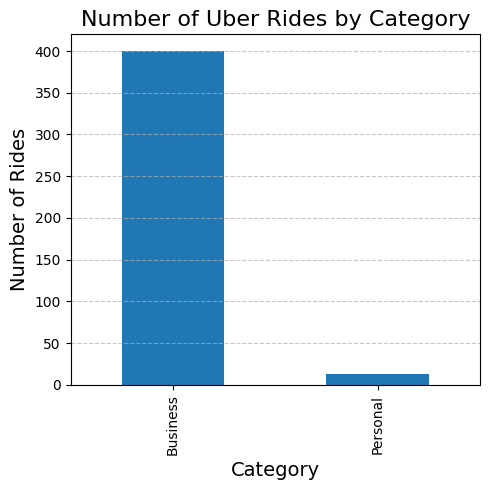

In [ ]:
plt.figure(figsize=(5,5))
category_counts.plot(kind="bar")
plt.title('Number of Uber Rides by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

For which purpose do people book Uber rides the most?

In [48]:

df["PURPOSE*"].value_counts()

PURPOSE*
NOT                159
Meeting             78
Meal/Entertain      62
Customer Visit      46
Errand/Supplies     45
Temporary Site      14
Between Offices      9
Name: count, dtype: int64

C:\Users\Jarvis\AppData\Local\Temp\ipykernel_12160\1931119358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="PURPOSE*" , palette="coolwarm")


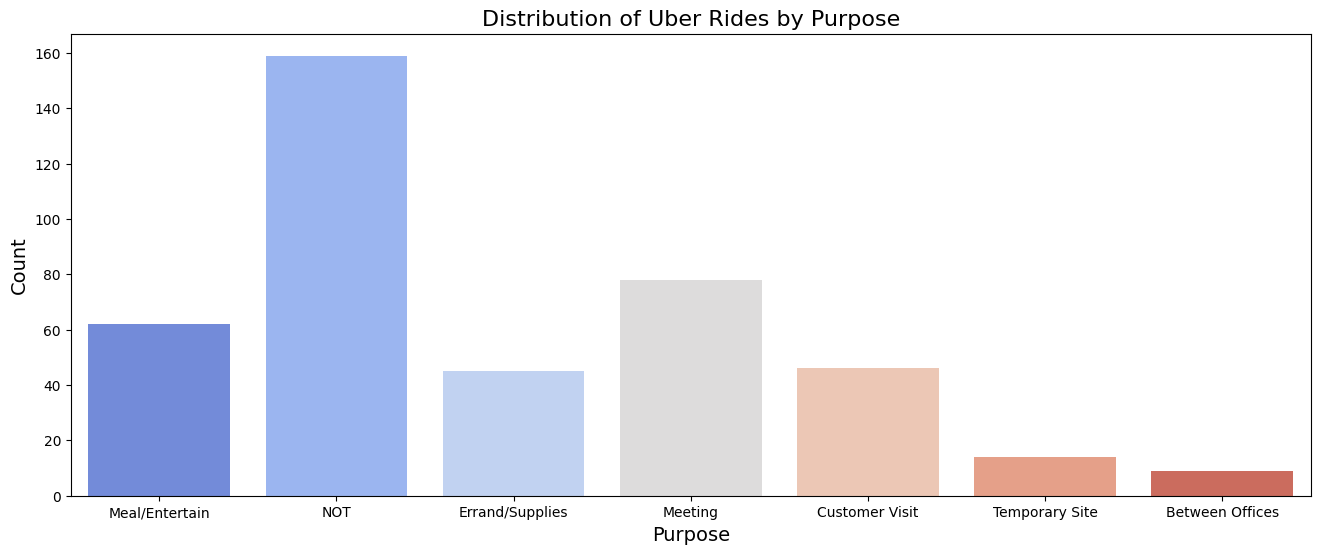

In [53]:
plt.figure(figsize=(16,6))
sns.countplot(data=df, x="PURPOSE*" , palette="coolwarm")
plt.title("Distribution of Uber Rides by Purpose", fontsize=16)
plt.xlabel("Purpose", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

At what time do people book cabs the most from Uber?

In [54]:
df["Day-Night"].value_counts()

Day-Night
Afternoon    142
Evening      137
Night         71
Morning       63
Name: count, dtype: int64

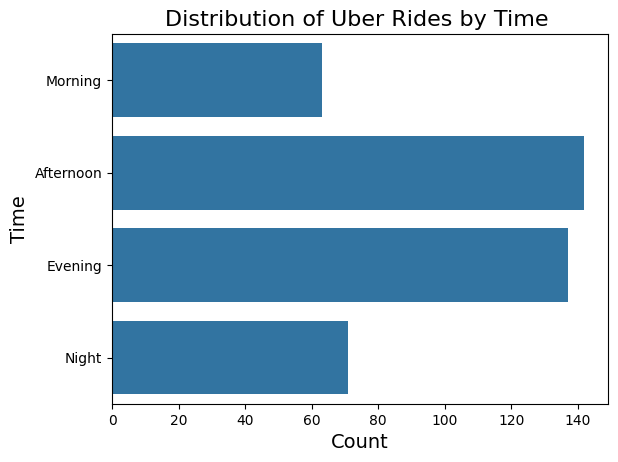

In [57]:
sns.countplot(df["Day-Night"])
plt.title("Distribution of Uber Rides by Time ", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Time", fontsize=14)
plt.show()

In which months do people book Uber rides less frequently?

In [59]:
df["Month"]=pd.DatetimeIndex(df["START_DATE*"]).month

In [60]:
month_label={1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df["Month"]=df.Month.map(month_label)

In [63]:
months_count = df["Month"].value_counts().sort_values(ascending=True)
months_count

Month
Sep      13
Jan      23
Oct      24
April    24
May      26
July     34
Dec      39
Feb      40
June     42
Mar      42
Aug      43
Nov      63
Name: count, dtype: int64

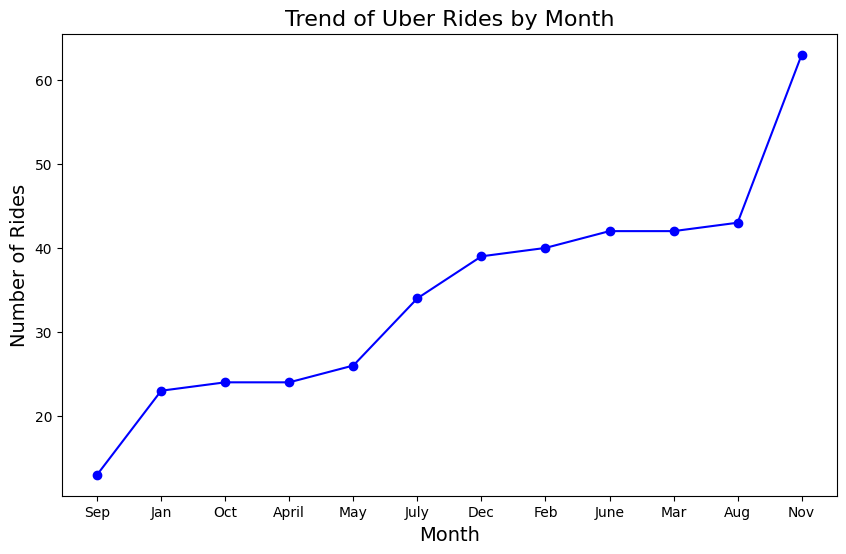

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(months_count.index,months_count.values,marker='o', linestyle='-', color='b', label="Ride Count")
plt.title("Trend of Uber Rides by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Rides", fontsize=14)
plt.show()

In [71]:
# Total count of people who book cab, where miles is greater then 100
len(df[df["MILES*"]>=100])

4

In [72]:
# Total count of people who book cab, where miles is between 1 and 50
len(df[(df["MILES*"]>0) & (df["MILES*"]<=50)])

405

In [73]:
# Total count of people who book cab, where miles is between 51 and 99
len(df[(df["MILES*"]>50) & (df["MILES*"]<100)])

4

<Axes: ylabel='MILES*'>

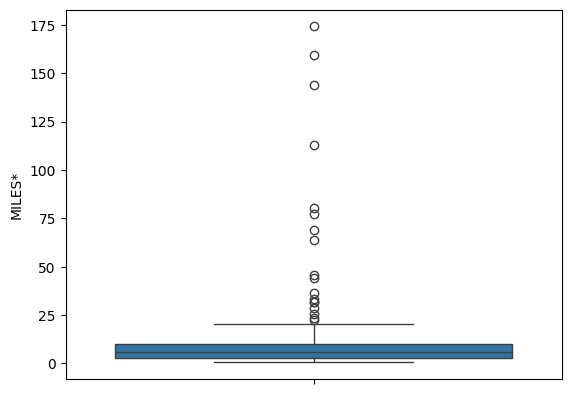

In [74]:
sns.boxplot(df["MILES*"])

<Axes: ylabel='MILES*'>

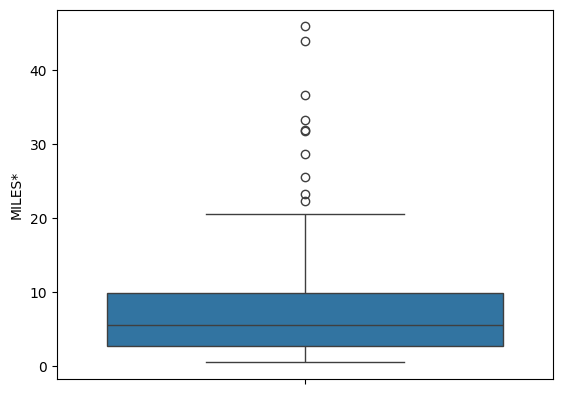

In [75]:
sns.boxplot(df[(df["MILES*"]>0) & (df["MILES*"]<=50)]["MILES*"])

<Axes: ylabel='MILES*'>

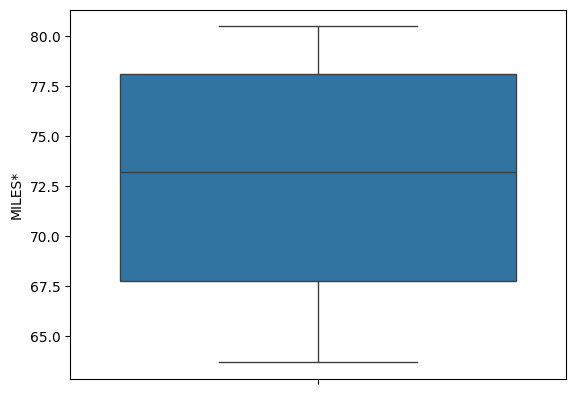

In [76]:
sns.boxplot(df[(df["MILES*"]>50) & (df["MILES*"]<100)]["MILES*"])

C:\Users\Jarvis\AppData\Local\Temp\ipykernel_12160\459234922.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["MILES*"]<=40]["MILES*"])


<Axes: xlabel='MILES*', ylabel='Density'>

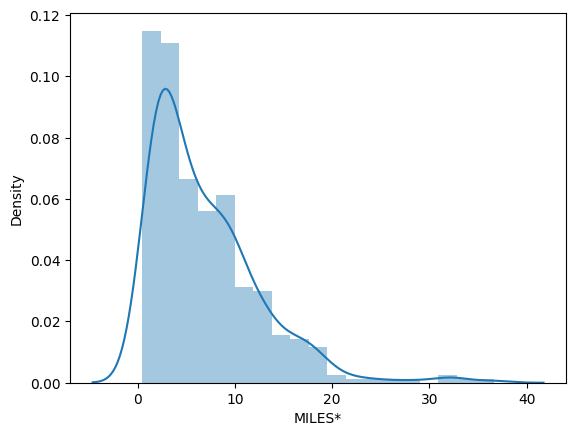

In [77]:
sns.distplot(df[df["MILES*"]<=40]["MILES*"])

People show the highest interest in booking Uber rides for trips ranging between 2 to 20 miles.

Conclusion:
This analysis provided valuable insights into user behavior and operational trends for Uber rides. Key findings, such as peak booking times and seasonal patterns, can assist in optimizing resource allocation, marketing strategies, and pricing models. The visualization of data allowed for a deeper understanding of the factors influencing ride bookings, ultimately helping to enhance customer satisfaction and operational efficiency.

The project demonstrates the importance of data analysis in solving real-world business challenges. It also highlights the power of Python and data visualization tools in transforming raw data into actionable insights